In [121]:
import numpy as np
import pandas as pd

data_path = './bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv') # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

## 이상치 제거

In [122]:
train = train[train['weather'] != 4] # 폭우, 폭설 데이터는 이상치 데이터 였다.

## 데이터 합치기

In [123]:
all_data = pd.concat([train, test] , ignore_index= True) # 인덱스 무시하고 이어 붙이기
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


## 파생 피처(변수) 추가

In [124]:
from datetime import datetime

# 날짜 피처 생성

all_data['date'] = all_data['datetime'].apply(lambda x : x.split()[0])

all_data['year'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[0])

all_data['month'] = all_data['datetime'].apply(lambda x : x.split()[0].split('-')[1])

all_data['hour'] = all_data['datetime'].apply(lambda x : x.split()[1].split(':')[0])

all_data['minute'] = all_data['datetime'].apply(lambda x : x.split()[1].split(':')[1])

# 요일 피처 생성

all_data['weekday'] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString, '%Y-%m-%d').weekday())

# 훈련 데이터는 매달 1~19일 , 테스트 데이터는 20일~ 말일 ==> 대여 수량을 예측할 때 day 피처는 사용할 필요가 없다.

In [125]:
all_data['date'] = all_data['datetime'].apply(lambda x : x.split()[0])

all_data['datetime'] = pd.to_datetime(all_data['datetime'])

all_data['year'] = all_data['datetime'].dt.year # 연도

all_data['month'] = all_data['datetime'].dt.month # 월

all_data['hour'] = all_data['datetime'].dt.hour # 시간

all_data['minute'] = all_data['datetime'].dt.minute # 분

all_data['second'] = all_data['datetime'].dt.second # 초

all_data['weekday'] = all_data['datetime'].dt.weekday # 요일

all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,hour,minute,weekday,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,2011,1,0,0,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,2011,1,1,0,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2011,1,2,0,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,2011,1,3,0,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,2011,1,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,19,0,0,0
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,20,0,0,0
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,2012,12,21,0,0,0
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,2012,12,22,0,0,0


## 필요없는 피처 제거

In [126]:
drop_features = ['casual' , 'registered' , 'datetime' , 'date' , 'month' , 'windspeed']

all_data = all_data.drop(drop_features , axis = 1)

all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,minute,weekday,second
0,1,0,0,1,9.84,14.395,81,16.0,2011,0,0,5,0
1,1,0,0,1,9.02,13.635,80,40.0,2011,1,0,5,0
2,1,0,0,1,9.02,13.635,80,32.0,2011,2,0,5,0
3,1,0,0,1,9.84,14.395,75,13.0,2011,3,0,5,0
4,1,0,0,1,9.84,14.395,75,1.0,2011,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0,0,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0,0,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0,0,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0,0,0


In [127]:
# 훈련 데이터의 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])] # all_data의 count 열에서 null 이 아닌 값들에 대한 모든 열
X_test = all_data[pd.isnull(all_data['count'])] # all_data 의 count열에서 null 인 값들에 대한 모든 열

X_train

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,minute,weekday,second
0,1,0,0,1,9.84,14.395,81,16.0,2011,0,0,5,0
1,1,0,0,1,9.02,13.635,80,40.0,2011,1,0,5,0
2,1,0,0,1,9.02,13.635,80,32.0,2011,2,0,5,0
3,1,0,0,1,9.84,14.395,75,13.0,2011,3,0,5,0
4,1,0,0,1,9.84,14.395,75,1.0,2011,4,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,4,0,1,1,15.58,19.695,50,336.0,2012,19,0,2,0
10881,4,0,1,1,14.76,17.425,57,241.0,2012,20,0,2,0
10882,4,0,1,1,13.94,15.910,61,168.0,2012,21,0,2,0
10883,4,0,1,1,13.94,17.425,61,129.0,2012,22,0,2,0


In [128]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,minute,weekday,second
10885,1,0,1,1,10.66,11.365,56,NaN,2011,0,0,3,0
10886,1,0,1,1,10.66,13.635,56,NaN,2011,1,0,3,0
10887,1,0,1,1,10.66,13.635,56,NaN,2011,2,0,3,0
10888,1,0,1,1,10.66,12.880,56,NaN,2011,3,0,3,0
10889,1,0,1,1,10.66,12.880,56,NaN,2011,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0,0,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0,0,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0,0,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0,0,0


In [129]:
# 타깃값 count 제거
X_train = X_train.drop(['count'] , axis =1)
X_test = X_test.drop(['count'], axis =1)

y = train['count'] # 타깃값

In [130]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10885, dtype: int64

In [131]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,minute,weekday,second
0,1,0,0,1,9.84,14.395,81,2011,0,0,5,0
1,1,0,0,1,9.02,13.635,80,2011,1,0,5,0
2,1,0,0,1,9.02,13.635,80,2011,2,0,5,0
3,1,0,0,1,9.84,14.395,75,2011,3,0,5,0
4,1,0,0,1,9.84,14.395,75,2011,4,0,5,0


In [132]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

## 평가지표 계산 함수 작성

In [133]:
import numpy as np

def rmsle(y_true , y_pred , convertExp = True):

    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true +1))
    log_pred = np.nan_to_num(np.log(y_pred +1))


    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## 모델 훈련

In [134]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

log_y = np.log(y) # 타깃값 로그변환
linear_reg_model.fit(X_train , log_y) # 모델 훈련

LinearRegression()

In [135]:
preds = linear_reg_model.predict(X_test) # 코드 실행시 훈련된 선형 회귀 모델이 X_train 피처를 기반으로 타깃값을 예측

# 훈련시에는 훈련 데이터만, 검증시 검증 데이터만 , 테스트 시 테스트 데이터를 사용해야 한다.

# 지금처럼 훈련 시 사용한 데이터를 예측할 때 사용하는 경우는 없다.

# 시험 공부할 때 이미 풀어본 문제가 실제 시험에 나오면 안되는 이유와 같기 때문이다.

In [136]:
print(f'선형 회귀의 RMSLE 값 : {rmsle(preds, True) : .4f}')#

선형 회귀의 RMSLE 값 :  3.3995


## 예측 및 결과 제출

In [137]:
linearreg_preds =  linear_reg_model.predict(X_test) # 테스트 데이터로 예측

submission['count'] = np.exp(linearreg_preds) # 지수 변환
submission.to_csv('submission.csv' , index =False) # 파일로 저장

In [138]:
submission

,datetime,count
0,2011-01-20 00:00:00,11.362398
1,2011-01-20 01:00:00,13.601789
2,2011-01-20 02:00:00,15.084417
3,2011-01-20 03:00:00,16.308758
4,2011-01-20 04:00:00,18.086453
...,...,...
6488,2012-12-31 19:00:00,114.076538
6489,2012-12-31 20:00:00,126.511160
6490,2012-12-31 21:00:00,140.114463
6491,2012-12-31 22:00:00,169.345347


## 성능 개선 1 : 릿지 회귀 모델

In [139]:
# 릿지 회귀 모델은 L2 규제를 적용한 선형 회귀 모델이다. 규제란 모델이 훈련데이터에 과대적합되지 않도록 해주는 방법이다.

# 훈련 데이터에 과대적합되면 모델이 훈련 데이터에만 너무 잘 들어맞고, 테스트 데이터로는 제대로 예측하지 못한다.

# 따라서 모델이 과대 적합되지 않게 훈련하는 게 중요하다.

In [140]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [141]:
## 그리드 객체 생성

#그리드 서치는 하이퍼파라미터의 값을 바꿔가며 모델의 성능을 교차 검증으로 평가해 최적의 하이퍼파라미터 값을 찾아준다.

In [142]:
# 하이퍼파라미터 값 목록

ridge_params = {'max_iter' : [3000] , 'alpha' : [0.1 , 1, 2, 3,4, 10 ,30, 100, 200, 300 , 400 , 800, 900 , 1000]}

# 교차검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better= False)

# 릿지 모델은 규제를 적용한 회귀 모델이라고 한다. 릿지 모델에서 중요한 하이퍼파라미터는 alpha로 , 값이 클수록 규제 강도가 세진다.
# 적절한 규제를 적용한다면 , 즉 alpha를 적당한 크기로 하면 과대적합 문제를 개선할 수 있다.

In [143]:
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model, param_grid= ridge_params, scoring= rmsle_scorer, cv=5 )# 릿지 모델 , 값 목록 , 평가 지표 , 교차 검증 분할 수 )

# estimator : 분류 및 회귀 모델
# param_grid : 딕셔너리 형태로 모델의 하이퍼파라미터명과 여러 하이퍼파라미터 값을 지정
# scoring : 평가지표, 사이킷런에서 기본적인 평가지표를 문자열 형태로 제공.
# 정확도는 accuracy , F1 점수는 f1 , ROC-AUC는 roc_auc , 재현율은 recall로 표시
# make_scorer는 평가지표 계산 함수와 평가지표 점수가 높으면 좋은지 여부 등을 인수로 받는 교차 검증용 평가 함수이다.

# cv : 교차 검증 분할 개수(기본 값은 5)

In [144]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train , log_y) # 훈련(그리드 서치)

# 코드가 일관되도록 그리드서치 객체도 모델 객체와 똑같이 fit() 메서드를 제공한다. fit()을 실행하면 객체 생성 시 param_grid에 전달된 값을 순환하면서 교차 검증으로 평가지표 점수를 계산한다. 이때 가장 좋은 성능을 보인 값을 best_params_ 속성에 저장하여 최적 값으로
# 훈련한 모델(최적 예측기)를 best_estimator_ 속성에 저장한다.

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [145]:
print('최적 하이퍼파라미터 : ' , gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.1, 'max_iter': 3000}


## 성능 검증

In [146]:
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가

print(f'릿지 회귀 RMSLE 값 :  , {rmsle(log_y , preds , True) : .4f}')

릿지 회귀 RMSLE 값 :  ,  1.0205


## 라쏘 회귀 모델

In [147]:
# 라쏘 회귀 모델은 L1 규제를 적용한 선형 회귀 모델이다.

In [148]:
from sklearn.linear_model import Lasso

# 모델 생성

lasso_model = Lasso()

# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1 , 1 ,2 , 3, 4, 10 ,30 , 100 , 200 , 300 , 400 , 800 , 900, 1000])

lasso_params = {'max_iter' : [3000] , 'alpha' : lasso_alpha}

# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator= lasso_model , param_grid= lasso_params,
                                      scoring = rmsle_scorer , cv=5)

# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train , log_y)

print('최적 하이퍼파라미터 : ', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 :  {'alpha': 0.00125, 'max_iter': 3000}


## 성능 검증

In [149]:
# 예측

preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가

print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y , preds , True) : .4f}')

라쏘 회귀 RMSLE 값 :  1.0205


## 랜덤 포레스트 회귀 모델

In [150]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성

randomforest_model = RandomForestRegressor()

# 그리드서치 객체 생성

rf_params = {'random_state' : [42] , 'n_estimators' : [100, 120 ,140]} # random_state는 랜덤 시드값 , n_estimators는 랜덤 포레스트를 구성하는 결정 트리 개수

gridsearch_random_forest_model = GridSearchCV(estimator= randomforest_model , param_grid= rf_params ,
                                              scoring = rmsle_scorer , cv=5)

# 그리드서치 수행

log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train , log_y)

print('최적 하이퍼파라미터 : ' , gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 :  {'n_estimators': 140, 'random_state': 42}


In [151]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y , preds , True) : .4f}' )

랜덤 포레스트 회귀 RMSLE 값 :  0.1128


## 예측 및 결과 제출

Text(0.5, 1.0, 'Predicted Test Data Distribution')

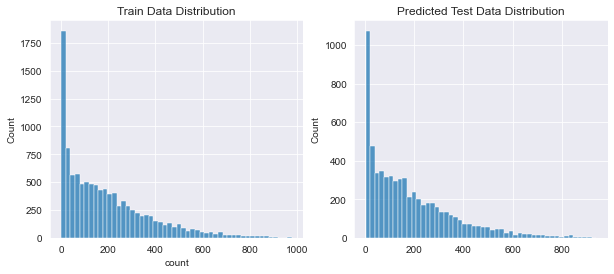

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(10,4)

sns.histplot(y, bins = 50 , ax = ax[0])
ax[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds) , bins = 50 , ax = ax[1])
ax[1].set_title('Predicted Test Data Distribution')

In [153]:
submission['count'] = np.exp(randomforest_preds) # 지수 변환

submission

submission.to_csv('C:/Users/andyp/Desktop/티스토리/머신러닝/KAGGLE/자전거수요예측/submission_랜덤포레스트.csv' , index =False) # 파일로 저장